In [8]:
from random import random 
from random import choice

In [67]:
patients_with_recurrence = [
    {"Menopause lt40": False, "Menopause ge40": True, "Menopause premeno": False, 
     "Inv-Nodes 0-2": False, "Inv-Nodes 3-5":True, "Inv-Nodes 6-8": False, 
     "Deg-malig 1": False, "Deg-malig 2": False, "Deg-malig 3": True
     },


    {"Menopause lt40": False, "Menopause ge40": True, "Menopause premeno": False, 
     "Inv-Nodes 0-2": False, "Inv-Nodes 3-5":False, "Inv-Nodes 6-8": True, 
     "Deg-malig 1": False, "Deg-malig 2": False, "Deg-malig 3": True},


    {"Menopause lt40": False, "Menopause ge40": False, "Menopause premeno": True, 
     "Inv-Nodes 0-2": True, "Inv-Nodes 3-5":False, "Inv-Nodes 6-8": False, 
     "Deg-malig 1": False, "Deg-malig 2": False, "Deg-malig 3": True},
     

]

In [69]:
patients_no_recurrence = [

    {"Menopause lt40": True, "Menopause ge40": False, "Menopause premeno": False, 
     "Inv-Nodes 0-2": True, "Inv-Nodes 3-5":False, "Inv-Nodes 6-8": False, 
     "Deg-malig 1": False, "Deg-malig 2": False, "Deg-malig 3": True},

    {"Menopause lt40": False, "Menopause ge40": True, "Menopause premeno": False, 
     "Inv-Nodes 0-2": True, "Inv-Nodes 3-5":False, "Inv-Nodes 6-8": False, 
     "Deg-malig 1": False, "Deg-malig 2": True, "Deg-malig 3": False},

    {"Menopause lt40": False, "Menopause ge40": False, "Menopause premeno": True, 
     "Inv-Nodes 0-2": True, "Inv-Nodes 3-5":False, "Inv-Nodes 6-8": False, 
     "Deg-malig 1": True, "Deg-malig 2": False, "Deg-malig 3": False},

]

In [5]:
# Checks if the condition is satisfied 
def evaluate_condition(observation, condition):
    truth_value_of_condition = True

    for feature in observation:
        if feature in condition and observation[feature] == False:
            truth_value_of_condition = False
            break
        if 'NOT ' + feature in condition and observation[feature] == True:
            truth_value_of_condition = False
         
            break
    
    return truth_value_of_condition

In [9]:
class Memory:
    def __init__(self, forget_value, memorize_value, memory):
        self.memory = memory
        self.forget_value = forget_value
        self.memorize_value = memorize_value
    
    def get_memory(self):
        return self.memory
    
    def get_literals(self):
        return list(self.memory.keys())
    
    def get_condition(self):
        condition = []
        for literal in self.memory:
            if self.memory[literal] >= 6:
                condition.append(literal)
        return condition
        
    def memorize(self, literal):
        if random() <= self.memorize_value and self.memory[literal] < 10:
            self.memory[literal] += 1
            
    def forget(self, literal):
        if random() <= self.forget_value and self.memory[literal] > 1:
            self.memory[literal] -= 1
            
    def memorize_always(self, literal):
        if  self.memory[literal] < 10:
            self.memory[literal] += 1

In [11]:
# Recurrence rules
rule_1=  Memory(0.2, 0.8, {'Menopause lt40':1, 'Menopause ge40':1, 'Menopause premeno':1, 
                             'NOT Menopause lt40':10, 'NOT Menopause ge40':1, 'NOT Menopause premeno':1, 
                             'Inv-Nodes 0-2': 1, 'Inv-Nodes 3-5':1, 'Inv-Nodes 6-8':1, 
                             'NOT Inv-Nodes 0-2':1, 'NOT Inv-Nodes 3-5': 1, 'NOT Inv-Nodes 6-8': 1, 
                             'Deg-malig 1':1, 'Deg-malig 2': 1, 'Deg-malig 3':10,
                             'NOT Deg-malig 1':1, 'NOT Deg-malig 2':1, 'NOT Deg-malig 3':1,
                         
                             })

rule_2=  Memory(0.2, 0.8,{'Menopause lt40':1, 'Menopause ge40':1, 'Menopause premeno':1, 
                             'NOT Menopause lt40':10, 'NOT Menopause ge40':1, 'NOT Menopause premeno':1, 
                             'Inv-Nodes 0-2': 1, 'Inv-Nodes 3-5':1, 'Inv-Nodes 6-8':1, 
                             'NOT Inv-Nodes 0-2':1, 'NOT Inv-Nodes 3-5': 1, 'NOT Inv-Nodes 6-8': 1, 
                             'Deg-malig 1':1, 'Deg-malig 2': 1, 'Deg-malig 3':10,
                             'NOT Deg-malig 1':1, 'NOT Deg-malig 2':1, 'NOT Deg-malig 3':1,
                         
                             })

# Non-recurrence rule
rule_3 = Memory(0.2, 0.8, {'Menopause lt40':1, 'Menopause ge40':1, 'Menopause premeno':1, 
                             'NOT Menopause lt40':1, 'NOT Menopause ge40':1, 'NOT Menopause premeno':1, 
                             'Inv-Nodes 0-2': 10, 'Inv-Nodes 3-5':1, 'Inv-Nodes 6-8':1, 
                             'NOT Inv-Nodes 0-2': 1, 'NOT Inv-Nodes 3-5': 1, 'NOT Inv-Nodes 6-8': 1, 
                             'Deg-malig 1':1, 'Deg-malig 2': 1, 'Deg-malig 3':1,
                             'NOT Deg-malig 1':1, 'NOT Deg-malig 2':1, 'NOT Deg-malig 3':1,
                    
                             })


In [71]:
rule_1.get_condition()

['NOT Menopause lt40', 'Deg-malig 3']

In [13]:

print("IF " + " AND ".join(rule_1.get_condition()) + " THEN Recurrence")

print("IF " + " AND ".join(rule_2.get_condition()) + " THEN Recurrence")

print("IF " + " AND ".join(rule_3.get_condition()) + " THEN No Recurrence")


IF NOT Menopause lt40 AND Deg-malig 3 THEN Recurrence
IF NOT Menopause lt40 AND Deg-malig 3 THEN Recurrence
IF Inv-Nodes 0-2 THEN No Recurrence


In [15]:
rule_4_recurrence = Memory(0.2, 0.8, {'Menopause lt40':5, 'Menopause ge40':5, 'Menopause premeno':5, 
                             'NOT Menopause lt40':5, 'NOT Menopause ge40':5, 'NOT Menopause premeno':5, 
                             'Inv-Nodes 0-2': 5, 'Inv-Nodes 3-5':5, 'Inv-Nodes 6-8':5, 
                             'NOT Inv-Nodes 0-2': 5, 'NOT Inv-Nodes 3-5': 5, 'NOT Inv-Nodes 6-8': 5, 
                             'Deg-malig 1':5, 'Deg-malig 2': 5, 'Deg-malig 3':5,
                             'NOT Deg-malig 1':5, 'NOT Deg-malig 2':5, 'NOT Deg-malig 3':5,
                    
                             })


rule_5_no_recurrence = Memory(0.2, 0.8, {'Menopause lt40':5, 'Menopause ge40':5, 'Menopause premeno':5, 
                             'NOT Menopause lt40':5, 'NOT Menopause ge40':5, 'NOT Menopause premeno':5, 
                             'Inv-Nodes 0-2': 5, 'Inv-Nodes 3-5':5, 'Inv-Nodes 6-8':5, 
                             'NOT Inv-Nodes 0-2': 5, 'NOT Inv-Nodes 3-5': 5, 'NOT Inv-Nodes 6-8': 5, 
                             'Deg-malig 1':5, 'Deg-malig 2': 5, 'Deg-malig 3':5,
                             'NOT Deg-malig 1':5, 'NOT Deg-malig 2':5, 'NOT Deg-malig 3':5,
                    
                             })


In [17]:
def type_i_feedback(observation, memory):
    remaining_literals = memory.get_literals()
    if evaluate_condition(observation, memory.get_condition()) == True:
        for feature in observation:
            if observation[feature] == True:
                memory.memorize(feature)
                remaining_literals.remove(feature)
            elif observation[feature] == False:
    
                memory.memorize('NOT ' + feature)
                remaining_literals.remove('NOT ' + feature)
    for literal in remaining_literals:
        memory.forget(literal)


In [19]:
def type_ii_feedback(observation, memory):
    if evaluate_condition(observation, memory.get_condition()) == True:
        for feature in observation:
#             memorize the opposite of the key, do not touch the key itself 
            if observation[feature] == False:
                memory.memorize_always(feature)
            elif observation[feature] == True:
                memory.memorize_always('NOT ' + feature)

In [21]:
def classify(observation, car_rules, plane_rules):
    vote_sum = 0
    for car_rule in car_rules:
        if evaluate_condition(observation, car_rule.get_condition()) == True:
            vote_sum += 1
    for plane_rule in plane_rules:
        if evaluate_condition(observation, plane_rule.get_condition()) == True:
            vote_sum -= 1
    print("Vote sum is ", vote_sum)
    if vote_sum >= 0:
        return "Recurrence"
    else:
        return "No Recurrence"

In [23]:
print("===================Classification Recurrence=====================")
print(classify(patients_with_recurrence[0], [rule_1, rule_2], [rule_3]))
print(classify(patients_with_recurrence[1], [rule_1, rule_2,], [rule_3]))
print(classify(patients_with_recurrence[2], [rule_1, rule_2], [rule_3]))

print("===================Classification Non Recurrence=====================")
print(classify(patients_no_recurrence[0], [rule_1, rule_2], [rule_3]))
print(classify(patients_no_recurrence[1], [rule_1, rule_2,], [rule_3]))
print(classify(patients_no_recurrence[2], [rule_1, rule_2,], [rule_3]))

===================Classification Recurrence=====================
Vote sum is  2
Recurrence
Vote sum is  2
Recurrence
Vote sum is  1
Recurrence
===================Classification Non Recurrence=====================
Vote sum is  -1
No Recurrence
Vote sum is  -1
No Recurrence
Vote sum is  -1
No Recurrence


In [25]:
for i in range(100):
    observation_id = choice([0,1,2])
    recurrence = choice([0,1])
    if recurrence == 1:
        type_i_feedback(patients_with_recurrence[observation_id], rule_4_recurrence)
    else:
        type_ii_feedback(patients_no_recurrence[observation_id], rule_4_recurrence)

In [27]:
for i in range(100):
    observation_id = choice([0,1,2])
    recurrence = choice([0,1])
    if recurrence == 1:
        type_i_feedback(patients_no_recurrence[observation_id], rule_5_no_recurrence)
    else:
        type_ii_feedback(patients_with_recurrence[observation_id], rule_5_no_recurrence)

In [29]:

print("=========Rule 1==========")
print("IF " + " AND ".join(rule_1.get_condition()) + " THEN Recurrence")
print("=========Rule 2==========")
print("IF " + " AND ".join(rule_2.get_condition()) + " THEN Recurrence")
print("=========Rule 3==========")
print("IF " + " AND ".join(rule_3.get_condition()) + " THEN Non Recurrence")
print("=========Rule 4==========")
print("IF " + " AND ".join(rule_4_recurrence.get_condition()) + " THEN Recurrence")
print("=========Rule 5==========")
print("IF " + " AND ".join(rule_5_no_recurrence.get_condition()) + " THEN Non Recurrence")


=========Rule 1==========
IF NOT Menopause lt40 AND Deg-malig 3 THEN Recurrence
=========Rule 2==========
IF NOT Menopause lt40 AND Deg-malig 3 THEN Recurrence
=========Rule 3==========
IF Inv-Nodes 0-2 THEN Non Recurrence
=========Rule 4==========
IF Menopause ge40 AND NOT Menopause premeno AND NOT Inv-Nodes 6-8 AND Deg-malig 3 AND NOT Deg-malig 1 AND NOT Deg-malig 2 THEN Recurrence
=========Rule 5==========
IF Menopause lt40 AND NOT Menopause ge40 AND NOT Menopause premeno AND Inv-Nodes 0-2 AND NOT Inv-Nodes 3-5 AND NOT Inv-Nodes 6-8 AND Deg-malig 3 AND NOT Deg-malig 1 AND NOT Deg-malig 2 THEN Non Recurrence


In [31]:
print("===================Classification Recurrence=====================")
print(classify(patients_with_recurrence[0], [rule_1, rule_2, rule_4_recurrence], [rule_3, rule_5_no_recurrence]))
print(classify(patients_with_recurrence[1], [rule_1, rule_2, rule_4_recurrence], [rule_3, rule_5_no_recurrence]))
print(classify(patients_with_recurrence[2], [rule_1, rule_2, rule_4_recurrence], [rule_3, rule_5_no_recurrence]))

print("===================Classification Non Recurrence=====================")
print(classify(patients_no_recurrence[0], [rule_1, rule_2, rule_4_recurrence], [rule_3, rule_5_no_recurrence]))
print(classify(patients_no_recurrence[1], [rule_1, rule_2, rule_4_recurrence], [rule_3, rule_5_no_recurrence]))
print(classify(patients_no_recurrence[2], [rule_1, rule_2, rule_4_recurrence], [rule_3, rule_5_no_recurrence]))


===================Classification Recurrence=====================
Vote sum is  3
Recurrence
Vote sum is  2
Recurrence
Vote sum is  1
Recurrence
===================Classification Non Recurrence=====================
Vote sum is  -2
No Recurrence
Vote sum is  -1
No Recurrence
Vote sum is  -1
No Recurrence


In [33]:
print(evaluate_condition(patients_no_recurrence[0], rule_1.get_condition()))
print(evaluate_condition(patients_no_recurrence[0], rule_2.get_condition()))
print(evaluate_condition(patients_no_recurrence[0], rule_3.get_condition()))

False
False
True


Here is Ladans' task:

In [79]:
#0.8 and memorize value 0.2 to learn a rule for Recurrence
rule_4_recurrence_new = Memory(0.8, 0.2, {'Menopause lt40':5, 'Menopause ge40':5, 'Menopause premeno':5, 
                             'NOT Menopause lt40':5, 'NOT Menopause ge40':5, 'NOT Menopause premeno':5, 
                             'Inv-Nodes 0-2': 5, 'Inv-Nodes 3-5':5, 'Inv-Nodes 6-8':5, 
                             'NOT Inv-Nodes 0-2': 5, 'NOT Inv-Nodes 3-5': 5, 'NOT Inv-Nodes 6-8': 5, 
                             'Deg-malig 1':5, 'Deg-malig 2': 5, 'Deg-malig 3':5,
                             'NOT Deg-malig 1':5, 'NOT Deg-malig 2':5, 'NOT Deg-malig 3':5,
                    
                             })

In [81]:
for i in range(100):
    observation_id = choice([0,1,2])
    recurrence = choice([0,1])
    if recurrence == 1:
        type_i_feedback(patients_with_recurrence[observation_id], rule_4_recurrence_new)
    else:
        type_ii_feedback(patients_no_recurrence[observation_id], rule_4_recurrence_new)

In [83]:
print("IF " + " AND ".join(rule_4_recurrence_new.get_condition()) + " THEN Recurrence")

IF NOT Inv-Nodes 0-2 THEN Recurrence


Here is the plot:

IF  THEN Recurrence


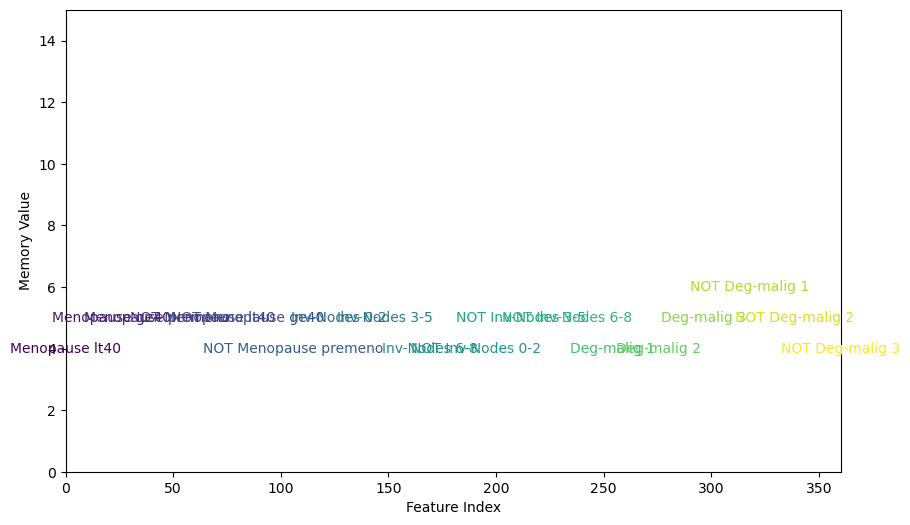

In [10]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from random import randint, choice
import numpy as np
from IPython.display import HTML

# Define the literals based on the rule
literals = ['Menopause lt40', 'Menopause ge40', 'Menopause premeno', 
            'NOT Menopause lt40', 'NOT Menopause ge40', 'NOT Menopause premeno', 
            'Inv-Nodes 0-2', 'Inv-Nodes 3-5', 'Inv-Nodes 6-8', 
            'NOT Inv-Nodes 0-2', 'NOT Inv-Nodes 3-5', 'NOT Inv-Nodes 6-8', 
            'Deg-malig 1', 'Deg-malig 2', 'Deg-malig 3', 
            'NOT Deg-malig 1', 'NOT Deg-malig 2', 'NOT Deg-malig 3']

# Initial memory state for the literals
initial_memory_values = {literal: 5 for literal in literals}

# Create Memory class with methods (as provided)
class Memory:
    def __init__(self, forget_value, memorize_value, memory):
        self.memory = memory
        self.forget_value = forget_value
        self.memorize_value = memorize_value
    
    def get_memory(self):
        return self.memory
    
    def get_literals(self):
        return list(self.memory.keys())
    
    def get_condition(self):
        condition = []
        for literal in self.memory:
            if self.memory[literal] >= 6:
                condition.append(literal)
        return condition
        
    def memorize(self, literal):
        if np.random.random() <= self.memorize_value and self.memory[literal] < 10:
            self.memory[literal] += 1
            
    def forget(self, literal):
        if np.random.random() <= self.forget_value and self.memory[literal] > 1:
            self.memory[literal] -= 1
            
    def memorize_always(self, literal):
        if self.memory[literal] < 10:
            self.memory[literal] += 1

# Feedback functions (simplified for demonstration)
def evaluate_condition(observation, condition):
    truth_value_of_condition = True
    for feature in observation:
        if feature in condition and observation[feature] == False:
            truth_value_of_condition = False
            break
        if 'NOT ' + feature in condition and observation[feature] == True:
            truth_value_of_condition = False
            break
    return truth_value_of_condition

def type_i_feedback(observation, memory):
    remaining_literals = memory.get_literals()
    if evaluate_condition(observation, memory.get_condition()):
        for feature in observation:
            if observation[feature] == True:
                memory.memorize(feature)
                remaining_literals.remove(feature)
            elif observation[feature] == False:
                memory.memorize('NOT ' + feature)
                remaining_literals.remove('NOT ' + feature)
    for literal in remaining_literals:
        memory.forget(literal)

def type_ii_feedback(observation, memory):
    if evaluate_condition(observation, memory.get_condition()):
        for feature in observation:
            if observation[feature] == False:
                memory.memorize_always(feature)
            elif observation[feature] == True:
                memory.memorize_always('NOT ' + feature)

# Sample data for patients (3 patients with recurrence and 3 without)
patients_with_recurrence = [
    {"Menopause lt40": False, "Menopause ge40": True, "Menopause premeno": False, 
     "Inv-Nodes 0-2": False, "Inv-Nodes 3-5": True, "Inv-Nodes 6-8": False, 
     "Deg-malig 1": False, "Deg-malig 2": False, "Deg-malig 3": True},
    {"Menopause lt40": False, "Menopause ge40": True, "Menopause premeno": False, 
     "Inv-Nodes 0-2": False, "Inv-Nodes 3-5": False, "Inv-Nodes 6-8": True, 
     "Deg-malig 1": False, "Deg-malig 2": False, "Deg-malig 3": True},
    {"Menopause lt40": False, "Menopause ge40": False, "Menopause premeno": True, 
     "Inv-Nodes 0-2": True, "Inv-Nodes 3-5": False, "Inv-Nodes 6-8": False, 
     "Deg-malig 1": False, "Deg-malig 2": False, "Deg-malig 3": True}
]

patients_no_recurrence = [
    {"Menopause lt40": True, "Menopause ge40": False, "Menopause premeno": False, 
     "Inv-Nodes 0-2": True, "Inv-Nodes 3-5": False, "Inv-Nodes 6-8": False, 
     "Deg-malig 1": False, "Deg-malig 2": True, "Deg-malig 3": False},
    {"Menopause lt40": True, "Menopause ge40": False, "Menopause premeno": False, 
     "Inv-Nodes 0-2": True, "Inv-Nodes 3-5": False, "Inv-Nodes 6-8": False, 
     "Deg-malig 1": True, "Deg-malig 2": False, "Deg-malig 3": False},
    {"Menopause lt40": True, "Menopause ge40": False, "Menopause premeno": True, 
     "Inv-Nodes 0-2": False, "Inv-Nodes 3-5": True, "Inv-Nodes 6-8": False, 
     "Deg-malig 1": False, "Deg-malig 2": True, "Deg-malig 3": False}
]

# Initialize rule
rule_4_recurrence_new = Memory(0.8, 0.2, initial_memory_values.copy())
print("IF " + " AND ".join(rule_4_recurrence_new.get_condition()) + " THEN Recurrence")
# Track memory evolution
num_iterations = 100
memory_evolution = {literal: [] for literal in literals}

# Simulate learning process
for i in range(num_iterations):
    observation_id = choice([0, 1, 2])
    recurrence = choice([0, 1])
    if recurrence == 1:
        type_i_feedback(patients_with_recurrence[observation_id], rule_4_recurrence_new)
    else:
        type_ii_feedback(patients_no_recurrence[observation_id], rule_4_recurrence_new)
    
    # Record memory state after each iteration
    current_memory = rule_4_recurrence_new.get_memory()
    for literal in literals:
        memory_evolution[literal].append(current_memory[literal])

# Animation setup
x_positions = np.linspace(0, 360, len(literals))  # Fixed x positions for each literal
colors = plt.cm.viridis(np.linspace(0, 1, len(literals)))  # Generate distinct colors
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim(0, 360)  # Set the x-axis limit to match x_positions range
ax.set_ylim(0, 15)  # Set the y-axis limit for memory values
ax.set_xlabel('Feature Index')
ax.set_ylabel('Memory Value')

# Initialize scatter plot objects for each literal
# Initialize scatter plot objects for each literal with different colors
scatter_texts = [ax.text(x, 5, literal, fontsize=10, ha='center', va='center', color=color) 
                 for x, literal, color in zip(x_positions, literals, colors)]
# Update function for the animation
def update(frame):
    for i, literal in enumerate(literals):
        y = memory_evolution[literal][frame]  # Update the y position based on memory value
        scatter_texts[i].set_position((x_positions[i], y))  # Move text (literal) vertically
    return scatter_texts

# Create the animation
ani = FuncAnimation(fig, update, frames=num_iterations, interval=100, blit=False)

# Display the animation inline in the notebook
HTML(ani.to_jshtml())


In [31]:
print("IF " + " AND ".join(rule_4_recurrence_new.get_condition()) + " THEN Recurrence")


IF NOT Menopause lt40 AND Deg-malig 3 AND NOT Deg-malig 1 AND NOT Deg-malig 2 THEN Recurrence


In [37]:
ani.save('animation.gif', writer='pillow', fps=30)